# Importing Libraries

In [1]:
import os
import zipfile

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download & Explore Dataset

In [2]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2021-09-16 11:48:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   175MB/s    in 0.8s    

2021-09-16 11:48:23 (175 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
  -O /tmp/validation-horse-or-human.zip 

--2021-09-16 11:48:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-09-16 11:48:23 (121 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
zip_file = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/horse_or_human')

zip_file = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path='/tmp/validation-horse_or_human')

zip_ref.close()

In [5]:
base_dir = '/tmp/horse_or_human/'
val_base_dir = '/tmp/validation-horse_or_human/'
print(base_dir)
print(val_base_dir)

train_horse_dir = os.path.join(base_dir, 'horses/')
print(train_horse_dir)
train_human_dir = os.path.join(base_dir, 'humans/')
print(train_human_dir)

validation_horse_dir = os.path.join(val_base_dir, 'horses/')
print(validation_horse_dir)
validation_human_dir = os.path.join(val_base_dir, 'humans/')
print(validation_human_dir)

/tmp/horse_or_human/
/tmp/validation-horse_or_human/
/tmp/horse_or_human/horses/
/tmp/horse_or_human/humans/
/tmp/validation-horse_or_human/horses/
/tmp/validation-horse_or_human/humans/


In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse33-4.png', 'horse13-1.png', 'horse02-1.png', 'horse40-0.png', 'horse44-2.png', 'horse26-5.png', 'horse38-4.png', 'horse04-7.png', 'horse50-5.png', 'horse48-1.png']
['human16-00.png', 'human14-00.png', 'human03-13.png', 'human02-28.png', 'human13-19.png', 'human08-27.png', 'human14-20.png', 'human02-27.png', 'human05-28.png', 'human15-03.png']
['horse3-141.png', 'horse4-232.png', 'horse5-589.png', 'horse5-488.png', 'horse5-235.png', 'horse3-255.png', 'horse4-389.png', 'horse5-203.png', 'horse4-159.png', 'horse1-484.png']
['valhuman05-20.png', 'valhuman01-01.png', 'valhuman04-07.png', 'valhuman04-11.png', 'valhuman04-21.png', 'valhuman02-24.png', 'valhuman03-23.png', 'valhuman02-15.png', 'valhuman05-24.png', 'valhuman05-23.png']


In [7]:
total_train_horse_image = len(train_horse_names)
total_train_human_image = len(train_human_names)

print("Total train horse images: ", total_train_horse_image)
print("Total train human images: ", total_train_human_image)

Total train horse images:  500
Total train human images:  527


In [8]:
validation_train_horse_image = len(validation_horse_names)
validation_train_human_image = len(validation_human_names)

print("Total validation horse images: ", validation_train_horse_image)
print("Total validation human images: ", validation_train_human_image)

Total validation horse images:  128
Total validation human images:  128


# Data Augmentation & Create Data Generator

In [9]:
train_dir = base_dir
validation_dir = val_base_dir

train_data_gen = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
validation_data_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary',
                                                     batch_size=20)

validation_generator = validation_data_gen.flow_from_directory(directory=validation_dir,
                                                          target_size=(150, 150),
                                                          class_mode='binary',
                                                          batch_size=20)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Download Pretrained Model

In [10]:
# Download the inception v3 weights

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-09-16 11:48:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   156MB/s    in 0.5s    

2021-09-16 11:48:25 (156 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [11]:
# Import the inception model  

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [12]:
# Create an instance of the inception model from the local pre-trained weights

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

In [13]:
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

In [14]:
# Print the model summary
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


# Build Model & Train

In [16]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [17]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
len(train_generator), len(validation_generator)

(52, 13)

In [22]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_generator),
            epochs = 100,
            validation_steps = len(validation_generator),
            callbacks=[callbacks])

Epoch 1/100
52/52 [==============================] - 15s 280ms/step - loss: 1.6824 - accuracy: 0.9640 - val_loss: 0.3304 - val_accuracy: 0.9922
Epoch 2/100
52/52 [==============================] - 14s 268ms/step - loss: 1.5398 - accuracy: 0.9679 - val_loss: 0.1081 - val_accuracy: 0.9961
Epoch 3/100
52/52 [==============================] - 14s 262ms/step - loss: 0.9362 - accuracy: 0.9757 - val_loss: 1.3685e-33 - val_accuracy: 1.0000
Epoch 4/100
52/52 [==============================] - 14s 260ms/step - loss: 1.3912 - accuracy: 0.9718 - val_loss: 0.0030 - val_accuracy: 0.9961
Epoch 5/100
52/52 [==============================] - 14s 265ms/step - loss: 0.1246 - accuracy: 0.9942 - val_loss: 6.0795 - val_accuracy: 0.9023
Epoch 6/100
52/52 [==============================] - 13s 258ms/step - loss: 0.7701 - accuracy: 0.9873 - val_loss: 0.1763 - val_accuracy: 0.9961
Epoch 7/100
52/52 [==============================] - 14s 259ms/step - loss: 1.0497 - accuracy: 0.9864 - val_loss: 0.0927 - val_accur

In [23]:
model.evaluate(validation_generator)

13/13 [==============================] - 1s 90ms/step - loss: 0.0358 - accuracy: 0.9961


[0.03581841289997101, 0.99609375]

# Evaluate Loss & Accuracy

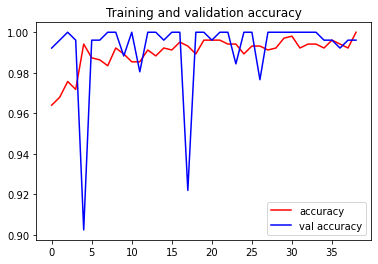

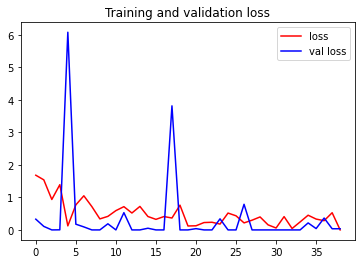

In [24]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'r', label='accuracy')
plt.plot  ( epochs, val_acc , 'b', label='val accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='loss')
plt.plot  ( epochs, val_loss , 'b', label='val loss')
plt.title ('Training and validation loss'   )
plt.legend()